In [1]:
def crossproduct(p0, p1, p2):
    x1, y1 = (p1[0] - p0[0]), (p1[1] - p0[1])
    x2, y2 = (p2[0] - p0[0]), (p2[1] - p0[1])
    return (x1*y2-y1*x2)

def is_clockwise(p0,p1,p2,p3,p4):
    if crossproduct(p2, p3, p4) > 0:
        if crossproduct(p3, p4, p0) > 0:
            if crossproduct(p4, p0, p1) > 0:
                return True
    return False

def area_triangle_double(p1,p2,p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    return abs(x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2))

def double_area(points):
    return abs(sum(area_triangle_double(points[0], points[i-1], points[i]) for i in range(2, len(points))))

def create_polygon(points, curr_points, n, gridsize, curr_area, min_area):
    if curr_points >= 3:
        if not is_clockwise(points[0], points[1], points[curr_points-3], points[curr_points-2], points[curr_points-1]):
            return False
        curr_area += area_triangle_double(points[0], points[curr_points-2], points[curr_points-1])
        if curr_area >= min_area[0]:
            return False
    if curr_points == n:
        min_area[0] = curr_area
        yield points.copy()
        return False
    possible_points = []
    for i in range(gridsize):
        for j in range(-gridsize//2, gridsize//2):
            possible_points.append((i,j))
    possible_points.sort(key=lambda x: abs(points[curr_points][0]-x[0]) + abs(points[curr_points][1]-x[1]))
    
    for i,j in possible_points:
        if (i,j) not in points:
            points[curr_points] = (i,j)
            for shape in create_polygon(points, curr_points+1, n, gridsize, curr_area, min_area):
                yield shape
    points[curr_points] = (0,0)
    return False

In [2]:
import time
start = time.perf_counter()
n = 10
points = [(0,0)]*n
gridsize = 7
results = []
for shape in create_polygon(points, 1, n, gridsize, 0, [gridsize**2]):
    results.append(shape)
    print(round(time.perf_counter()-start, 2), "seconds,", double_area(shape), "area, points:", shape)
print(round(time.perf_counter()-start, 2))

0.07 seconds, 28 area, points: [(0, 0), (0, -1), (1, -2), (2, -2), (4, -1), (5, 0), (5, 1), (4, 2), (3, 2), (1, 1)]
8.71


[28]


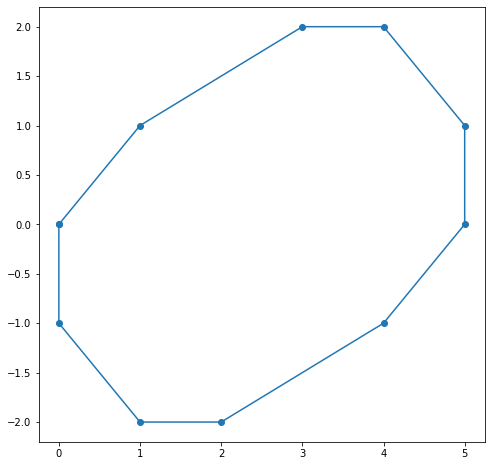

In [3]:
print([double_area(shape) for shape in results])
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
i,j = zip(*results[-1])
i = list(i) + [i[0]]
j = list(j) + [j[0]]
plt.plot(i,j)
plt.scatter(i,j)
plt.show()